In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt
from matplotlib import rcParams

config = {
    "font.family":"serif",
    "font.size":14,
    "mathtext.fontset":'stix',
    "font.serif":['SimSun']
}
rcParams.update(config)

In [2]:
train = pd.read_csv('../preprocessed/combined_features_256.csv')
test  = pd.read_csv('../preprocessed/combined_features_256_test.csv')
train = shuffle(train, random_state=42)
y_train = train['label']
x_train = train.drop('label', axis=1)
Y_test = test['label']
X_test = test.drop('label', axis=1)

In [3]:
# 定义每个算法的模型实例
models = {
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(verbose=0, force_row_wise=True),
    'CatBoost': cb.CatBoostClassifier(verbose=0),
    'GBDT': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(kernel="linear", decision_function_shape="ovo", max_iter=100000),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree', leaf_size=10, p=1, n_jobs=-1)
}
p = []

In [4]:
for alg, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(X_test)
    # accuracy = accuracy_score(Y_test, y_pred)
    p.append(y_pred)

c:\Users\admin\anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [5]:
m = ['XGBoost', 'LightGBM', 'CatBoost', 'GBDT', 'RF', 'DT', 'SVM', 'Naive Bayes', 'KNN']

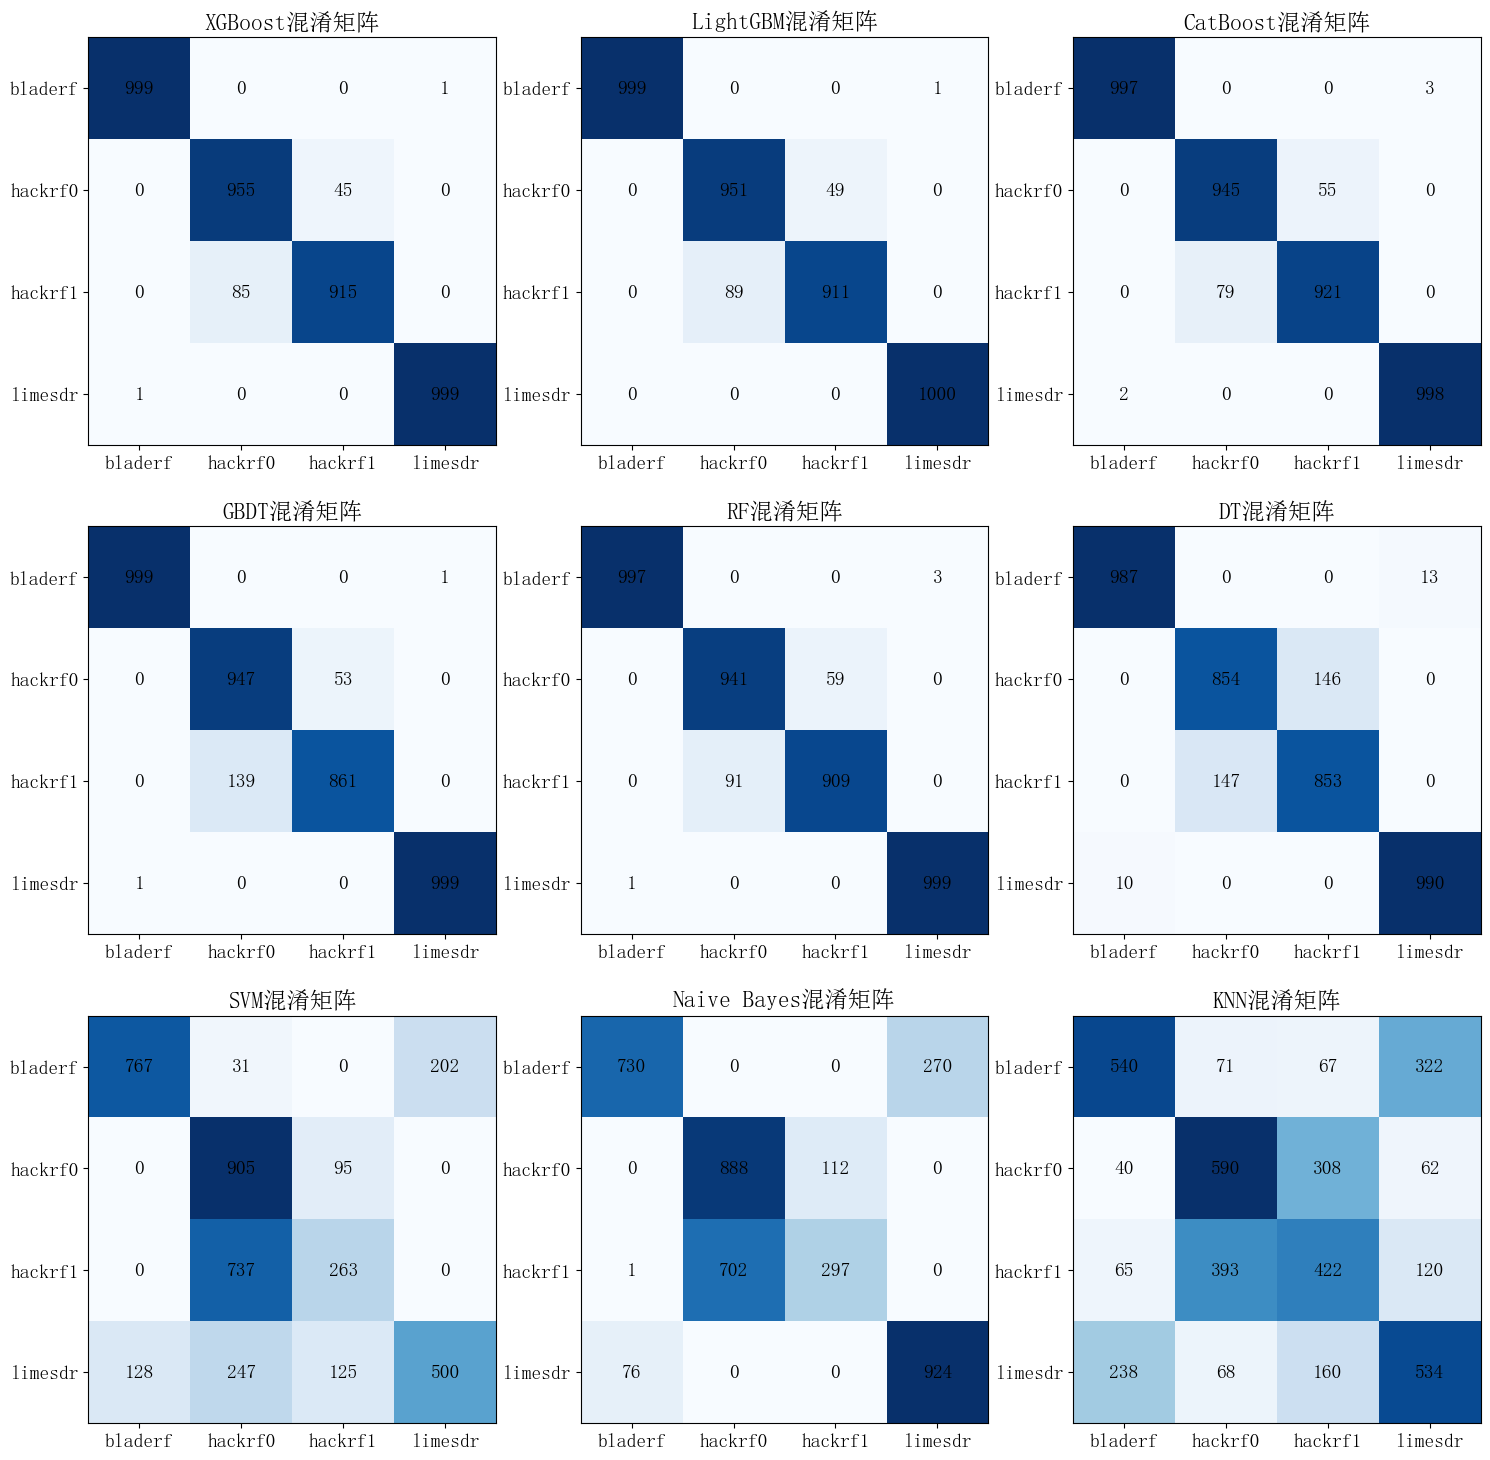

In [6]:
# 创建九个子图
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# plt.subplot(3, 3, 1)
# conf_mat = confusion_matrix(Y_test, accuracies['XGBoost'])
# plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
# for i in range(len(conf_mat)):
#     for j in range(len(conf_mat)):
#         plt.annotate(conf_mat[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
# plt.title('XGBoost混淆矩阵', fontproperties="SimHei")
# plt.ylabel('真实类别', fontproperties="SimSun")
# plt.xlabel('预测类别', fontproperties="SimSun")
# plt.xticks(range(4), ['bladerf', 'hackrf0', 'hackrf1', 'limesdr'])
# plt.yticks(range(4), ['bladerf', 'hackrf0', 'hackrf1', 'limesdr'])
# plt.colorbar()

for k in range(1, 10):
    plt.subplot(3, 3, k)
    conf_mat = confusion_matrix(Y_test, p[k-1])
    plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
    for i in range(len(conf_mat)):
        for j in range(len(conf_mat)):
            plt.annotate(conf_mat[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
    plt.title(m[k-1]+'混淆矩阵')
    
    plt.xticks(range(4), ['bladerf', 'hackrf0', 'hackrf1', 'limesdr'])
    plt.yticks(range(4), ['bladerf', 'hackrf0', 'hackrf1', 'limesdr'])
# plt.ylabel('真实类别', fontproperties="SimSun")
# plt.xlabel('预测类别', fontproperties="SimSun")
plt.savefig('./img/cm.png',dpi=1000, bbox_inches='tight')

plt.show()